In [1]:
import pandas as pd
import os
import numpy as np
import re

In [2]:
files = os.listdir('.')
files

['deviations_from_mean.zip',
 '.DS_Store',
 'deviations_from_mean.csv',
 '300_80k_20-60.csv',
 'old',
 'get_ngrams.ipynb',
 'df_new.csv',
 '.ipynb_checkpoints',
 'three_hundred_clusters.csv',
 'dtw.ipynb',
 'clustering.ipynb']

In [4]:
#files = [f for f in files if '.pkl' in f]
#files
df = pd.read_csv('deviations_from_mean.csv')

In [5]:
df.head()

,unigram,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2005,2006,2007,2008,2009,summa,max_diff,rel_summa,rel_max_diff,deviation_from_mean
0,как,47.047624,50.485318,51.249606,51.324196,51.174535,50.690452,43.827938,46.661967,43.969615,...,42.500982,43.109769,42.680030,43.139763,42.728090,247411509.0,1358855.0,3818.433795,6.862513,23.66
1,для,39.036406,39.355981,36.372634,35.476594,34.023851,33.740838,37.896171,34.679782,37.146528,...,30.345128,30.883207,30.777979,29.839784,29.342707,224808916.0,949912.0,3299.256128,4.312338,11.44
2,который,57.506854,58.760933,48.914409,49.913671,45.856711,43.924041,41.801180,40.520746,37.656026,...,35.102393,35.800814,35.790432,35.352373,35.406858,205673046.0,1095121.0,3207.133563,9.846525,68.56
3,или,24.556165,25.115971,23.030987,20.249053,19.808623,20.124200,23.478078,20.004466,20.104439,...,17.760823,19.057366,18.700423,19.169327,20.437974,105426662.0,535503.0,1631.491025,5.029258,41.63
4,год,18.330851,15.306693,15.909211,14.357555,14.889439,15.255392,17.956783,17.783390,16.347415,...,20.784922,21.194543,21.730999,21.910810,21.658590,100948572.0,692196.0,1454.257712,3.444267,38.61


df = pd.DataFrame()

for f in files:
    print (pd.read_pickle(f).shape)
    df = pd.concat([df, pd.read_pickle(f)]) #, how='outer')

In [19]:
df_new = df.groupby(['unigram', 'year']).page_count.sum().unstack().reset_index()

In [21]:
df_new.head()

year,unigram,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,i5вn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,275.0,343.0,278.0,82.0,17.0,46.0,17.0,35.0,15.0,6.0
1,i5вы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,1.0,1.0,4.0,NaN,1.0,6.0,1.0
2,i8вn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.0,99.0,95.0,36.0,25.0,24.0,19.0,21.0,6.0,NaN
3,ii1а,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,iiiго,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,3.0,NaN,2.0,4.0,NaN,3.0,NaN


In [26]:
df_new = df_new.fillna(0)

In [53]:
df_new['summa'] = df_new.iloc[:,1:].sum(axis=1)

In [54]:
df_new.head()

,unigram,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,summa
0,i5вn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,343.0,278.0,82.0,17.0,46.0,17.0,35.0,15.0,6.0,1647.0
1,i5вы,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,1.0,1.0,4.0,0.0,1.0,6.0,1.0,118.0
2,i8вn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,99.0,95.0,36.0,25.0,24.0,19.0,21.0,6.0,0.0,699.0
3,ii1а,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0
4,iiiго,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,2.0,4.0,0.0,3.0,0.0,46.0


In [55]:
def save_df():
    df_new.to_csv('df_new.csv', index=False)

In [46]:
df_new = pd.read_csv('df_new.csv')

In [32]:
len(df_new.unigram.unique())
# 184606

410241

In [72]:
df_new = df_new.sort_values('summa', ascending=False)

In [109]:
df_new[(df_new.summa > 1000000)].tail()

,unigram,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2002,2003,2004,2005,2006,2007,2008,2009,summa,max_diff
230241,извлечение,120.0,233.0,303.0,315.0,619.0,1235.0,1139.0,1236.0,2078.0,...,12773.0,11838.0,11031.0,10403.0,8965.0,7690.0,7008.0,4501.0,1003220.0,5852.0
131845,грузовой,30.0,68.0,58.0,90.0,314.0,385.0,1004.0,276.0,5190.0,...,10481.0,12401.0,9598.0,9299.0,9152.0,8507.0,8129.0,3689.0,1003123.0,8921.0
255218,интернационал,41.0,796.0,3466.0,3019.0,3831.0,6783.0,5215.0,4106.0,4378.0,...,6641.0,7888.0,7870.0,6875.0,6907.0,5787.0,4914.0,3312.0,1002949.0,19478.0
206120,драматург,150.0,161.0,134.0,155.0,619.0,2717.0,1189.0,926.0,906.0,...,14919.0,16718.0,16209.0,17550.0,15178.0,12100.0,10958.0,6361.0,1001580.0,7695.0
28999,алтайский,45.0,64.0,136.0,174.0,305.0,450.0,528.0,879.0,1092.0,...,27920.0,25606.0,27302.0,26503.0,23742.0,18386.0,11247.0,7094.0,1000041.0,8243.0


In [74]:
df_new['max_diff'] = df_new.iloc[:,1:-1].diff(axis=1).apply(abs).max(axis=1)

In [75]:
df_new.head()

,unigram,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2002,2003,2004,2005,2006,2007,2008,2009,summa,max_diff
284962,как,120655.0,112975.0,137627.0,194268.0,394619.0,575743.0,385135.0,508180.0,533074.0,...,4484164.0,4913135.0,4782128.0,4647662.0,4259223.0,3674996.0,3369597.0,2010742.0,247411509.0,1358855.0
185685,для,100110.0,88070.0,97676.0,134283.0,262366.0,383229.0,333010.0,377686.0,450353.0,...,3366015.0,3564258.0,3429932.0,3318368.0,3051245.0,2650161.0,2330751.0,1380839.0,224808916.0,949912.0
365069,который,147478.0,131494.0,131356.0,188929.0,353612.0,498890.0,367325.0,441298.0,456530.0,...,3791027.0,4104542.0,3944806.0,3838595.0,3537102.0,3081762.0,2761333.0,1666212.0,205673046.0,1095121.0
242601,или,62975.0,56204.0,61848.0,76645.0,152749.0,228571.0,206312.0,217862.0,243740.0,...,2032741.0,2194632.0,2085164.0,1942221.0,1882858.0,1610214.0,1497294.0,961791.0,105426662.0,535503.0
108869,год,47010.0,34253.0,42723.0,54345.0,114816.0,173271.0,157794.0,193673.0,198191.0,...,2226010.0,2374949.0,2310229.0,2272919.0,2094010.0,1871164.0,1711428.0,1019232.0,100948572.0,692196.0


In [108]:
df_new[df_new.summa < 10000000].sort_values('max_diff', ascending=False).head()

,unigram,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2002,2003,2004,2005,2006,2007,2008,2009,summa,max_diff
164684,дер,285.0,333.0,452.0,417.0,1184.0,1261.0,1173.0,3096.0,2337.0,...,20219.0,14754.0,16803.0,15405.0,10749.0,11541.0,10568.0,5933.0,1165042.0,192172.0
222163,иванович,1712.0,838.0,1639.0,2230.0,4533.0,6259.0,3106.0,5110.0,7018.0,...,104619.0,121667.0,130724.0,121585.0,96887.0,83959.0,74390.0,48799.0,4856055.0,145893.0
221955,иван,3990.0,2366.0,2614.0,3396.0,7816.0,13228.0,8931.0,11933.0,13170.0,...,164918.0,190922.0,205908.0,197312.0,162523.0,155991.0,120105.0,75504.0,8372918.0,129468.0
369990,красноармеец,111.0,368.0,659.0,1192.0,1686.0,2268.0,2320.0,2759.0,2233.0,...,12649.0,12440.0,13542.0,14899.0,11607.0,10488.0,9211.0,4680.0,1178404.0,128103.0
81610,гвк,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,...,2066.0,296.0,1535.0,2806.0,1137.0,107.0,116.0,38.0,163792.0,112883.0


In [ ]:
df_new = df_new.sort_values('max_diff', ascending=False)

In [104]:
indexes = list(df_new[df_new.summa > 100000000].sort_values('max_diff', ascending=False).index)

In [105]:
import matplotlib.pyplot as plt

In [106]:
df_new.head()

,unigram,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2002,2003,2004,2005,2006,2007,2008,2009,summa,max_diff
284962,как,120655.0,112975.0,137627.0,194268.0,394619.0,575743.0,385135.0,508180.0,533074.0,...,4484164.0,4913135.0,4782128.0,4647662.0,4259223.0,3674996.0,3369597.0,2010742.0,247411509.0,1358855.0
185685,для,100110.0,88070.0,97676.0,134283.0,262366.0,383229.0,333010.0,377686.0,450353.0,...,3366015.0,3564258.0,3429932.0,3318368.0,3051245.0,2650161.0,2330751.0,1380839.0,224808916.0,949912.0
365069,который,147478.0,131494.0,131356.0,188929.0,353612.0,498890.0,367325.0,441298.0,456530.0,...,3791027.0,4104542.0,3944806.0,3838595.0,3537102.0,3081762.0,2761333.0,1666212.0,205673046.0,1095121.0
242601,или,62975.0,56204.0,61848.0,76645.0,152749.0,228571.0,206312.0,217862.0,243740.0,...,2032741.0,2194632.0,2085164.0,1942221.0,1882858.0,1610214.0,1497294.0,961791.0,105426662.0,535503.0
108869,год,47010.0,34253.0,42723.0,54345.0,114816.0,173271.0,157794.0,193673.0,198191.0,...,2226010.0,2374949.0,2310229.0,2272919.0,2094010.0,1871164.0,1711428.0,1019232.0,100948572.0,692196.0


аллахвердяной


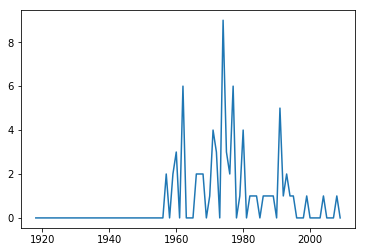

In [107]:
n = indexes[0]
plt.plot(df_new.iloc[n,1:-2].index.map(int), list(df_new.iloc[n, 1:-2]))
print (df_new.iloc[n]['unigram'])

In [110]:
rel_count = pd.read_csv('ngram_stats.csv')

In [111]:
rel_count = rel_count[rel_count.year > 1917]

In [112]:
rel_count.year.unique()

array([1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928,
       1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009])

In [113]:
rel_freq_list = list(rel_count.match_count)

In [118]:
len(df_new.iloc[:, 1:-2].columns), len(rel_freq_list)

(92, 92)

In [120]:
# count relative frequencies
df_new.iloc[:, 1:-2] = df_new.iloc[:, 1:-2] / rel_freq_list * 10000

In [217]:
df_new.head(10)

,unigram,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2004,2005,2006,2007,2008,2009,summa,max_diff,rel_summa,rel_max_diff
0,как,47.047624,50.485318,51.249606,51.324196,51.174535,50.690452,43.827938,46.661967,43.969615,...,42.694196,42.500982,43.109769,42.680030,43.139763,42.728090,247411509.0,1358855.0,3818.433795,6.862513
1,для,39.036406,39.355981,36.372634,35.476594,34.023851,33.740838,37.896171,34.679782,37.146528,...,30.621972,30.345128,30.883207,30.777979,29.839784,29.342707,224808916.0,949912.0,3299.256128,4.312338
2,который,57.506854,58.760933,48.914409,49.913671,45.856711,43.924041,41.801180,40.520746,37.656026,...,35.218698,35.102393,35.800814,35.790432,35.352373,35.406858,205673046.0,1095121.0,3207.133563,9.846525
3,или,24.556165,25.115971,23.030987,20.249053,19.808623,20.124200,23.478078,20.004466,20.104439,...,18.616064,17.760823,19.057366,18.700423,19.169327,20.437974,105426662.0,535503.0,1631.491025,5.029258
4,год,18.330851,15.306693,15.909211,14.357555,14.889439,15.255392,17.956783,17.783390,16.347415,...,20.625414,20.784922,21.194543,21.730999,21.910810,21.658590,100948572.0,692196.0,1454.257712,3.444267
5,другой,19.031174,19.297703,18.592957,16.949021,16.869017,16.611967,17.831832,16.571343,15.652247,...,14.778867,14.222450,14.689135,14.484805,14.451360,14.647160,92584621.0,439498.0,1400.799490,1.643935
6,иметь,6.113403,8.910173,9.499798,7.494356,9.504181,10.882358,12.413525,12.358930,13.335791,...,9.869086,9.496350,9.588015,9.442865,9.209789,9.028301,68858372.0,294503.0,1049.552633,3.016487
7,когда,15.518249,15.840704,15.227382,17.708840,15.267069,14.013010,11.489592,11.833617,10.571039,...,9.898512,9.956927,9.979657,10.146790,10.569623,10.594186,57288715.0,327029.0,913.578601,2.545141
8,являться,8.539190,9.607292,8.243014,7.748773,8.493448,8.728989,9.313302,9.377662,9.679313,...,8.432048,8.315051,8.473536,8.425732,8.120707,7.884758,60130899.0,263250.0,889.666362,2.582421
9,два,8.341882,8.264890,8.991126,8.710963,9.227572,8.790971,9.350855,9.172807,9.708595,...,8.843006,8.749081,8.723851,8.684844,8.544551,8.314772,56219235.0,276120.0,840.210897,0.828111


In [122]:
df_new['rel_summa'] = df_new.iloc[:,1:-2].sum(axis=1)

In [123]:
df_new['rel_max_diff'] = df_new.iloc[:,1:-3].diff(axis=1).apply(abs).max(axis=1)

In [148]:
df_new = df_new.sort_values('rel_summa', ascending=False)

In [231]:
df_new[['unigram', 'rel_summa']].head(100)

,unigram,rel_summa
0,как,3818.433795
1,для,3299.256128
2,который,3207.133563
3,или,1631.491025
4,год,1454.257712
5,другой,1400.799490
6,иметь,1049.552633
7,когда,913.578601
8,являться,889.666362
9,два,840.210897


In [216]:
df_new.reset_index(drop=True, inplace=True)

In [233]:
df_new[(df_new.rel_summa > 100) & (df_new.rel_summa < 477)].sort_values('rel_max_diff', ascending=False).index

Int64Index([ 56, 140,  57,  62,  97,  26,  30,  35,  71,  87,
            ...
             80, 154,  99, 110, 107, 144, 142, 151, 150,  96],
           dtype='int64', length=139)

In [241]:
indexes = list(df_new[(df_new.rel_summa > 100) & (df_new.rel_summa < 477)].sort_values('rel_max_diff', ascending=False).index)

крестьянин


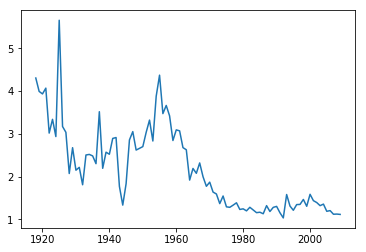

In [251]:
n = indexes[8]
plt.plot(df_new.iloc[n,1:-4].index.map(int), list(df_new.iloc[n, 1:-4]))
print (df_new.iloc[n]['unigram'])

# Let's try LSA

In [253]:
import numpy as np

In [254]:
def kmeans(data, k=3, normalize=False, limit=500):
    """Basic k-means clustering algorithm.
    """
    # optionally normalize the data. k-means will perform poorly or strangely if the dimensions
    # don't have the same ranges.
    if normalize:
        stats = (data.mean(axis=0), data.std(axis=0))
        data = (data - stats[0]) / stats[1]
    
    # pick the first k points to be the centers. this also ensures that each group has at least
    # one point.
    centers = data[:k]

    for i in range(limit):
        # core of clustering algorithm...
        # first, use broadcasting to calculate the distance from each point to each center, then
        # classify based on the minimum distance.
        classifications = np.argmin(((data[:, :, None] - centers.T[None, :, :])**2).sum(axis=1), axis=1)
        # next, calculate the new centers for each cluster.
        new_centers = np.array([data[classifications == j, :].mean(axis=0) for j in range(k)])

        # if the centers aren't moving anymore it is time to stop.
        if (new_centers == centers).all():
            break
        else:
            centers = new_centers
    else:
        # this will not execute if the for loop exits on a break.
        raise RuntimeError(f"Clustering algorithm did not complete within {limit} iterations")
            
    # if data was normalized, the cluster group centers are no longer scaled the same way the original
    # data is scaled.
    if normalize:
        centers = centers * stats[1] + stats[0]

    print(f"Clustering completed after {i} iterations")

    return classifications, centers

In [ ]:
data = 

In [ ]:
classifications, centers = kmeans(data, k=5)